In [2]:
!pip install statsmodels
!pip install -U lppls

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.8/47.8 kB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 260.7/260.7 kB 8.5 MB/s eta 0:00:00


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from statsmodels.tsa.stattools import adfuller
from datetime import datetime as dt
from lppls import lppls, data_loader
%matplotlib inline

In [5]:
start_date = "2017-01-01"
end_date = "2018-01-01"
# Fetch Bitcoin price data from Yahoo Finance
btc_data = yf.download("BTC-USD", start=start_date, end=end_date)

# Print the first few rows of the data
print(btc_data.head())


[*********************100%%**********************]  1 of 1 completed

                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2017-01-01   963.658020  1003.080017   958.698975   998.325012   998.325012   
2017-01-02   998.617004  1031.390015   996.702026  1021.750000  1021.750000   
2017-01-03  1021.599976  1044.079956  1021.599976  1043.839966  1043.839966   
2017-01-04  1044.400024  1159.420044  1044.400024  1154.729980  1154.729980   
2017-01-05  1156.729980  1191.099976   910.416992  1013.380005  1013.380005   

               Volume  
Date                   
2017-01-01  147775008  
2017-01-02  222184992  
2017-01-03  185168000  
2017-01-04  344945984  
2017-01-05  510199008  


In [6]:
btc_data.to_csv('btc_data.csv')
from google.colab import files
files.download('btc_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Log Periodic Power Law Singularity (LPPLS) Model 2017

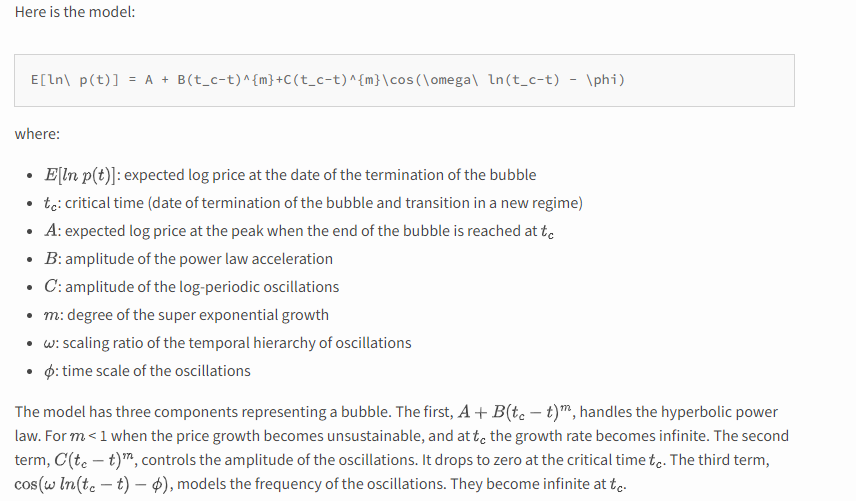

$E[ln\ p(t)] = A + B(t_c-t)^{m}+C(t_c-t)^{m}\cos(\omega\ ln(t_c-t) - \phi)$

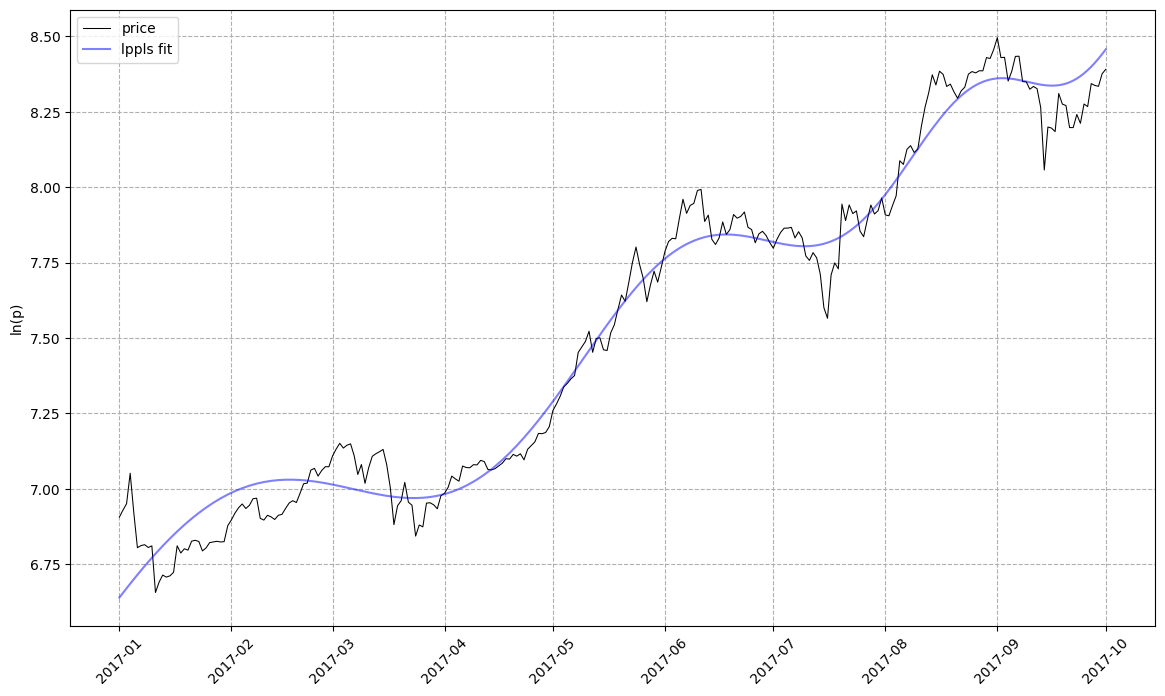

In [ ]:
# Load Bitcoin data from CSV
bitcoin_data = pd.read_csv('btc_prices.csv')

# Chọn dữ liệu từ 01/01/2017 đến 01/01/2018
bitcoin_data['Date'] = pd.to_datetime(bitcoin_data['Date'])
bitcoin_data = bitcoin_data[(bitcoin_data['Date'] >= '2017-01-01') & (bitcoin_data['Date'] <= '2017-10-01')]

# Convert time to ordinal
time = [pd.Timestamp.toordinal(t1) for t1 in bitcoin_data['Date']]

# Create list of observation data
price = np.log(bitcoin_data['Close'].values)

# Create observations array (expected format for LPPLS observations)
observations = np.array([time, price])

# Set the max number for searches to perform before giving up
# The literature suggests 25
MAX_SEARCHES = 2500000000000

# Instantiate a new LPPLS model with the Bitcoin dataset
lppls_model = lppls.LPPLS(observations=observations)

# Fit the model to the data and get back the params
tc, m, w, a, b, c, c1, c2, O, D = lppls_model.fit(MAX_SEARCHES)

# Visualize the fit
lppls_model.plot_fit()


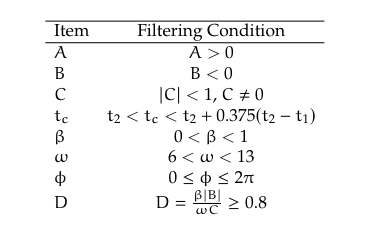

In [ ]:
print("Critical time (date of termination of the bubble and transition in a new regime) (Tc):", tc)
print("Expected log price at the peak when the end of the bubble is reached (A):", a)
print("Amplitude of the power law acceleration (B_0):", b)
print("Amplitude of the log-periodic oscillations (C):", c)
print("Degree of the super exponential growth (β):", m)
print("Scaling ratio of the temporal hierarchy of oscillations (ω):", w)
print(" time scale of the oscillations ϕ:", O)

Critical time (date of termination of the bubble and transition in a new regime) (Tc): 736706.4229613394
Expected log price at the peak when the end of the bubble is reached (A): 9.272816956197849
Amplitude of the power law acceleration (B_0): -0.008028338710775983
Amplitude of the log-periodic oscillations (C): 0.0007877199680419799
Degree of the super exponential growth (β): 0.9845385504812724
Scaling ratio of the temporal hierarchy of oscillations (ω): 13.747120777783637
 time scale of the oscillations ϕ: 2.826546983625521


True = 2017/12/15

In [ ]:
# Predict
date = dt.fromordinal(int(tc))

print(date)


2018-01-12 00:00:00


Confidence indicator

  0%|          | 0/115 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/lppls/lppls.py:617: RuntimeWarning: invalid value encountered in log
  return (w / (2.0 * np.pi)) * np.log((tc - t1) / (tc - t2))
/usr/local/lib/python3.10/dist-packages/lppls/lppls.py:617: RuntimeWarning: invalid value encountered in log
  return (w / (2.0 * np.pi)) * np.log((tc - t1) / (tc - t2))
/usr/local/lib/python3.10/dist-packages/lppls/lppls.py:617: RuntimeWarning: invalid value encountered in log
  return (w / (2.0 * np.pi)) * np.log((tc - t1) / (tc - t2))
/usr/local/lib/python3.10/dist-packages/lppls/lppls.py:617: RuntimeWarning: invalid value encountered in log
  return (w / (2.0 * np.pi)) * np.log((tc - t1) / (tc - t2))
/usr/local/lib/python3.10/dist-packages/lppls/lppls.py:617: RuntimeWarning: invalid value encountered in log
  return (w / (2.0 * np.pi)) * np.log((tc - t1) / (tc - t2))
/usr/local/lib/python3.10/dist-packages/lppls/lppls.py:617: RuntimeWarning: invalid value encountered in log
  

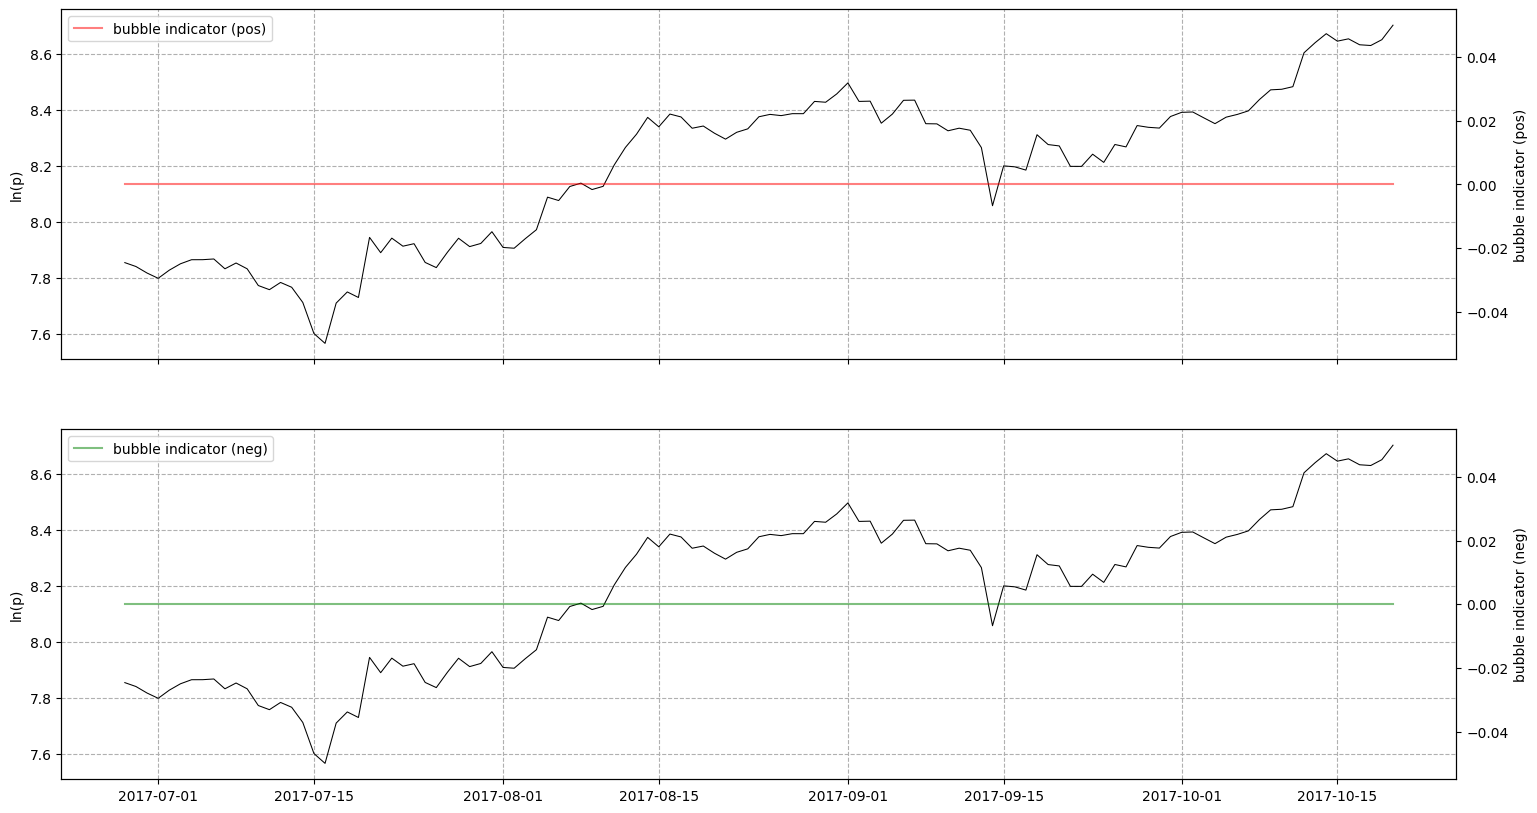

In [ ]:
# Compute the confidence indicator
res = lppls_model.mp_compute_nested_fits(
    workers=16,
    window_size=150,  # Adjusted to 150 trading days
    smallest_window_size=60,  # Adjusted to 60 trading days
    outer_increment=1,
    inner_increment=10,  # Adjusted to 10 trading days
    max_searches=250,
)

lppls_model.plot_confidence_indicators(res)

# 2019

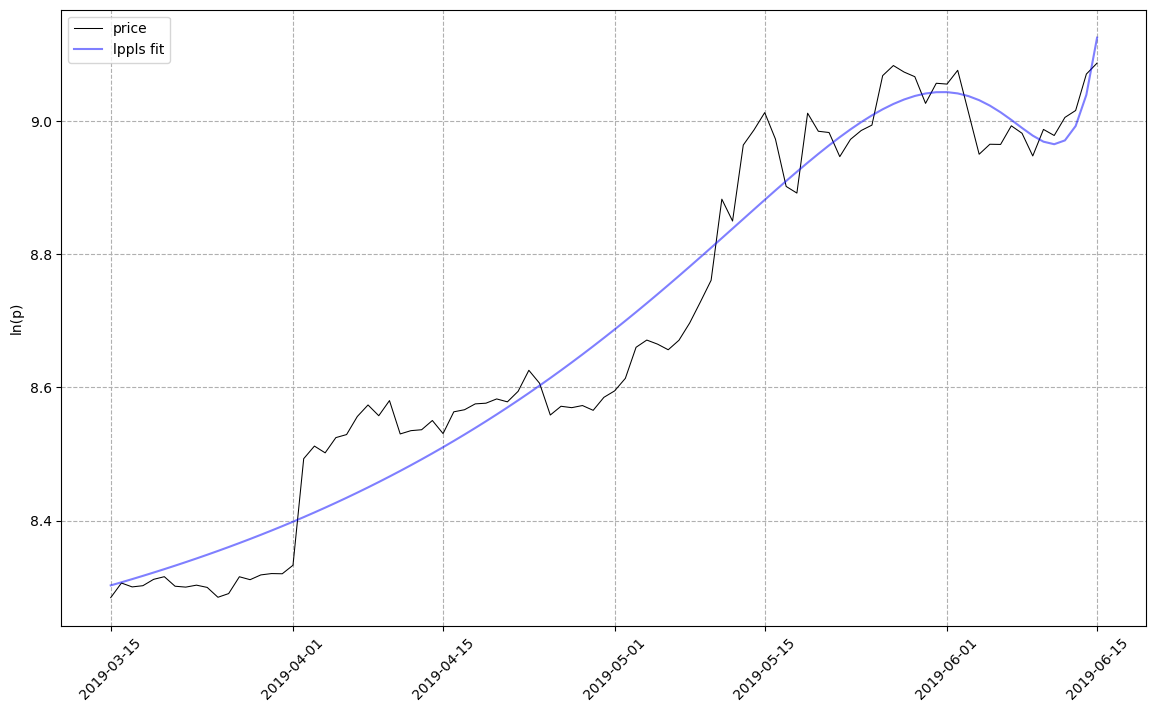

In [ ]:
bitcoin_data2 = pd.read_csv('btc_prices.csv')
# Chọn dữ liệu từ 01/01/2017 đến 01/01/2018
bitcoin_data2['Date'] = pd.to_datetime(bitcoin_data2['Date'])
bitcoin_data2 = bitcoin_data2[(bitcoin_data2['Date'] >= '2019-03-15') & (bitcoin_data2['Date'] <= '2019-06-15')]

# Convert time to ordinal
time2 = [pd.Timestamp.toordinal(t1) for t1 in bitcoin_data2['Date']]

# Create list of observation data
price2 = np.log(bitcoin_data2['Close'].values)

# Create observations array (expected format for LPPLS observations)
observations2 = np.array([time2, price2])

# Instantiate a new LPPLS model with the Bitcoin dataset
lppls_model2 = lppls.LPPLS(observations=observations2)

# Fit the model to the data and get back the params
tc2, m, w, a, b, c, c1, c2, O, D = lppls_model2.fit(MAX_SEARCHES)

# Visualize the fit
lppls_model2.plot_fit()


TRUE : 2019/6/25

In [ ]:
# Predict
date = dt.fromordinal(int(tc2))

print(date)


2019-07-02 00:00:00
